## Dataframes in this notebook:
1. `df`: the full dataframe
2. `articledf`: subset by articles only. later in doc creates "year" column
3. `articledf_20062015`, `articledf_19962005`, `articledf_19861995`, `articledf_19761985`, `articledf19661975`: subset by relevant decade

### Reading in data, specifying datatypes, creating subset dataframes

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
df = pd.read_csv("/Users/Luke/Documents/cs109/project/total.csv", dtype={})

/Users/Luke/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
df.head()

,Unnamed: 0,abstract,date,doctype,headline,id,news_desk,paragraph,section,subsection,text,type
0,0,NaN,2015-10-20,article,"To Reduce the Cost of Drugs, Look to Europe",5624cb2279881072a18d3b60,Upshot,"A system called reference pricing, used in sev...",The Upshot,NaN,"To Reduce the Cost of Drugs, Look to Europe A ...",News
1,1,Editorial reviews recent report by World Healt...,2015-10-28,article,Meat as a Cause of Cancer,56307762798810310043c222,Editorial,A recent report provides persuasive evidence t...,Opinion,NaN,Meat as a Cause of Cancer A recent report prov...,Editorial
2,2,NaN,2015-10-26,multimedia,Meat and Cancer: The W.H.O. Report and What Yo...,562e978e79881079d8f744f4,Health,Answers to a few questions about a report that...,Health,NaN,Meat and Cancer: The W.H.O. Report and What Yo...,Interactive Feature
3,3,World Health Organization scientists recommend...,2015-10-24,article,W.H.O. Panel Backs Polio Vaccine With Just 2 S...,562acef679881010ffa5f64d,Foreign,The scientists also recommended that infants a...,World,NaN,W.H.O. Panel Backs Polio Vaccine With Just 2 S...,Brief
4,4,NaN,2015-10-24,article,Egg Donor Payments,562ac28379881010ffa5f637,Letters,A bioethicist writes that eliminating all guid...,Opinion,NaN,Egg Donor Payments A bioethicist writes that e...,Letter


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df = df.drop('Unnamed: 0', 1)

In [7]:
df.dtypes

abstract              object
date          datetime64[ns]
doctype               object
headline              object
id                    object
news_desk             object
paragraph             object
section               object
subsection            object
text                  object
type                  object
dtype: object

In [8]:
df.shape

(403259, 11)

In [9]:
print sum(df['date'] == 'NaN'), sum(df['doctype'] == 'topic')

0 0


In [10]:
df.groupby('doctype').count().text

doctype
article       369890
blogpost       31369
column            13
multimedia      1879
recipe           108
Name: text, dtype: int64

### Plot for document type frequency

In [11]:
article_count = df.groupby('doctype').count().text.article
blogpost_count = df.groupby('doctype').count().text.blogpost
column_count = df.groupby('doctype').count().text.column
multimedia_count = df.groupby('doctype').count().text.multimedia
recipe_count = df.groupby('doctype').count().text.recipe
type_counts = [article_count, blogpost_count, column_count, multimedia_count, recipe_count]

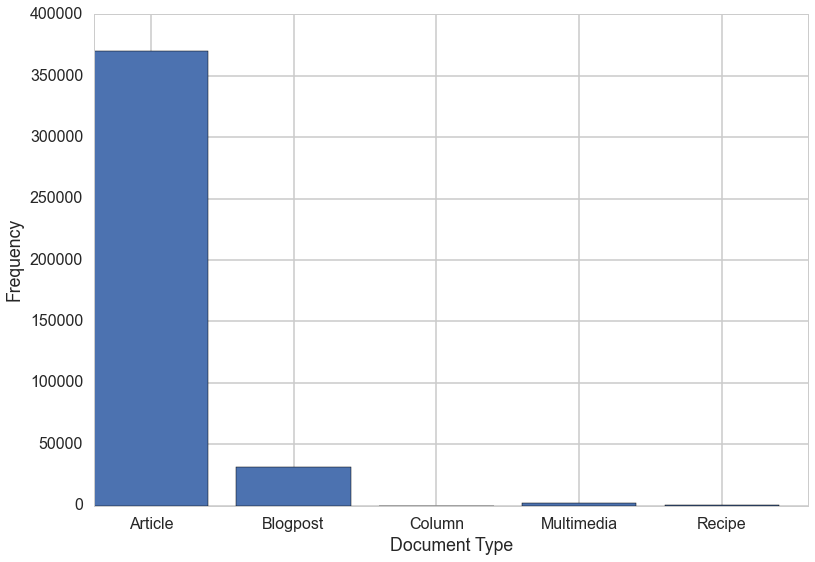

In [12]:
plt.bar(np.arange(1,6), type_counts)
plt.xticks(np.arange(1,6)+0.4,('Article', 'Blogpost', 'Column', 'Multimedia', 'Recipe'))
plt.xlabel('Document Type')
plt.ylabel('Frequency')
plt.show()

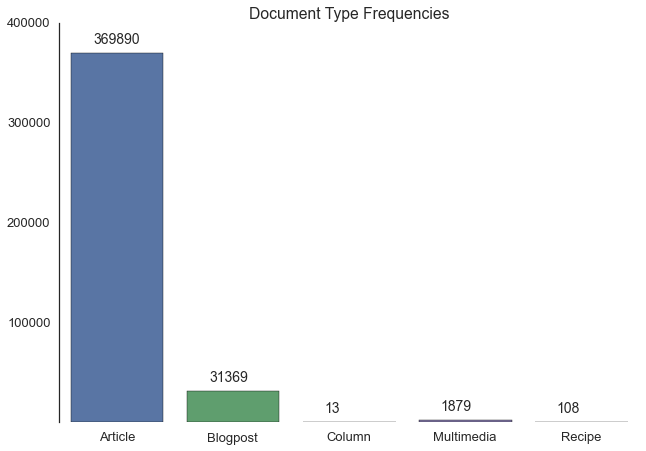

In [13]:
sns.set(style="white", context="talk")
ax = sns.barplot(x=('Article', 'Blogpost', 'Column', 'Multimedia', 'Recipe'), y=type_counts)
ax.set(title="Document Type Frequencies",ylim=(0,400000),yticks=[100000,200000,300000,400000])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2, height+10000, '%d'%height, fontsize=14)
#ax.text(-0.2,380000, "369,890", fontsize=14)
#ax.text(0.82,40000, "31,369", fontsize=14)
sns.despine(bottom=True)

### Creating separate dataframes for each decade and calculating number of articles for that decade

In [145]:
articledf = df[df['doctype']=='article']

In [45]:
articledf.shape

(369890, 11)

In [79]:
articledf_20062015 = articledf[articledf['date'] >= pd.to_datetime('2006-1-1')]
articledf_20062015.shape

(111974, 11)

In [80]:
articledf1 = articledf[articledf['date'] >= pd.to_datetime('1996-1-1')]
articledf_19962005 = articledf1[articledf1['date'] < pd.to_datetime('2006-1-1')]
articledf_19962005.shape

(79298, 11)

In [81]:
articledf2 = articledf[articledf['date'] >= pd.to_datetime('1986-1-1')]
articledf_19861995 = articledf2[articledf2['date'] < pd.to_datetime('1996-1-1')]
articledf_19861995.shape

(67605, 11)

In [82]:
articledf3 = articledf[articledf['date'] >= pd.to_datetime('1976-1-1')]
articledf_19761985 = articledf3[articledf3['date'] < pd.to_datetime('1986-1-1')]
articledf_19761985.shape

(60686, 11)

In [83]:
articledf4 = articledf[articledf['date'] >= pd.to_datetime('1966-1-1')]
articledf_19661975 = articledf4[articledf4['date'] < pd.to_datetime('1976-1-1')]
articledf_19661975.shape

(50327, 11)

### Creating plot for article frequency by year

In [149]:
articledf['year'] = articledf['date'].dt.year 

/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [150]:
articledf[articledf.date.dt.year == 2009].shape

(11036, 12)

In [151]:
articledf.head()

,abstract,date,doctype,headline,id,news_desk,paragraph,section,subsection,text,type,year
0,NaN,2015-10-20,article,"To Reduce the Cost of Drugs, Look to Europe",5624cb2279881072a18d3b60,Upshot,"A system called reference pricing, used in sev...",The Upshot,NaN,"To Reduce the Cost of Drugs, Look to Europe A ...",News,2015
1,Editorial reviews recent report by World Healt...,2015-10-28,article,Meat as a Cause of Cancer,56307762798810310043c222,Editorial,A recent report provides persuasive evidence t...,Opinion,NaN,Meat as a Cause of Cancer A recent report prov...,Editorial,2015
3,World Health Organization scientists recommend...,2015-10-24,article,W.H.O. Panel Backs Polio Vaccine With Just 2 S...,562acef679881010ffa5f64d,Foreign,The scientists also recommended that infants a...,World,NaN,W.H.O. Panel Backs Polio Vaccine With Just 2 S...,Brief,2015
4,NaN,2015-10-24,article,Egg Donor Payments,562ac28379881010ffa5f637,Letters,A bioethicist writes that eliminating all guid...,Opinion,NaN,Egg Donor Payments A bioethicist writes that e...,Letter,2015
5,NaN,2015-10-21,article,"Collective Health, Insurance Services Start-Up...",56269e997988105034cd95e8,Business,"Collective Health, which provides tools to hel...",Business Day,DealBook,"Collective Health, Insurance Services Start-Up...",News,2015


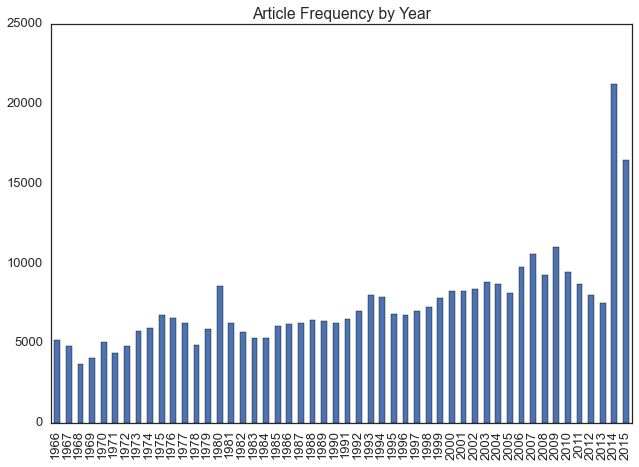

In [152]:
xticks = [1975,1980,1985,1990,1995,2000,2005,2010,2015]
years = articledf.year.value_counts().sort_index()
years.plot(title="Article Frequency by Year", kind='bar');

### Article frequency by day

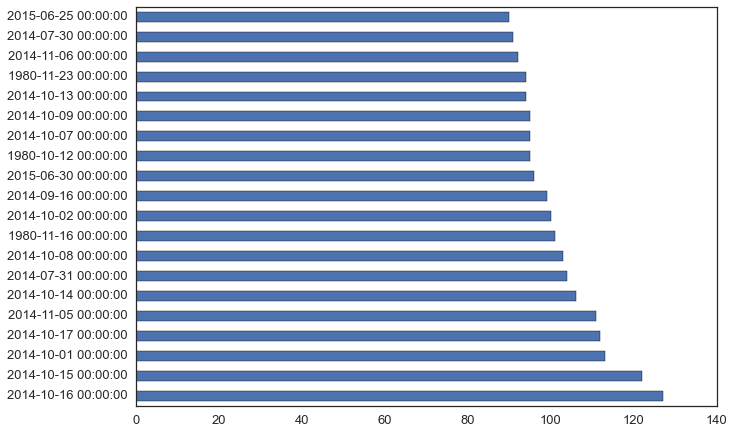

In [159]:
days = articledf.date.value_counts()
days[:20].plot(kind='barh');

In [164]:
days.index

DatetimeIndex(['2014-10-16', '2014-10-15', '2014-10-01', '2014-10-17', '2014-11-05', '2014-10-14', '2014-07-31', '2014-10-08', '1980-11-16', '2014-10-02', 
               ...
               '1979-03-10', '1992-08-01', '1972-08-19', '1968-07-25', '1968-11-09', '1977-07-23', '2005-09-26', '1980-02-02', '1982-03-25', '1971-04-10'], dtype='datetime64[ns]', length=18051, freq=None, tz=None)

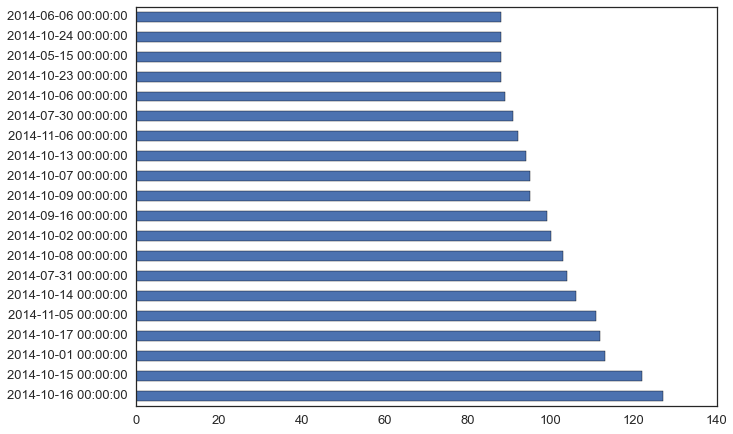

In [160]:
days2014 = articledf[articledf['year']==2014].date.value_counts()
days2014[:20].plot(kind='barh');

Total # of articles produced by NYT in 2013 = 117593

Total # of articles produced by NYT in 2014 = 308867